In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The DataFrame Data Structure
The DataFrame is a tabular data structure, with rows and columns. Rows have a specific index
to access them, wich can be any name or value. In Pandas, the columns are called
`series`, which in essence consists of a list of several values, where a special type of data,
which in essence consists of a list of several values, where each value has an index.

In [2]:
data = {
    'year': [
        2010, 2011, 2012,
        2010, 2011, 2012,
        2010, 2011, 2012
    ],
    'team': [
        'FCBarcelona', 'FCBarcelona',
        'FCBarcelona', 'RMadrid',
        'RMadrid', 'RMadrid',
        'ValenciaCF', 'ValenciaCF',
        'ValenciaCF'
    ],
    'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
    'draws': [6, 7, 4, 5, 4, 7, 8, 10, 8],
    'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
}

In [3]:
# can use the columns argument to order the columnns in
# the dataframe
football = pd.DataFrame(
    data, columns = ['year', 'team' ,'wins', 'draws', 'losses']
)

In [4]:
football
# each entry in the dictionary is a column,
# elements start at 0

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


## Reading

In [5]:
edu = pd.read_csv(
    'input/educ_figdp_1_data.csv',
    na_values = ':',
    usecols = ['TIME', 'GEO', 'Value']
)
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [6]:
# see how the data looks: first five rows
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [7]:
# last five rows
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [8]:
# a little statistical information on all numbeirc columns
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [9]:
# select just a column of the DataFrmae:
# put name of column in simple brackets []
# the tesult will be a Series data strcutre
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [10]:
# select a subset of rows from a DataFrame:
# indicate a range with (:)
# the slice does not use the index labels as references, but the
# position. In this case, the labels fo the rows simply coincide with the position
# of the rows
edu[10:19]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99
14,2002,European Union (27 countries),5.00
15,2003,European Union (27 countries),5.04
16,2004,European Union (27 countries),4.95
17,2005,European Union (27 countries),4.92
18,2006,European Union (27 countries),4.91


In [11]:
# if we want to select a subset of columns and rows using the
# labels as our references instead of the positions, we can use
# `ix` indexing
edu.index[90:94, ['TIME', 'GEO']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [12]:
print(
    'the above makes a mistake the method or attribute `ix` is deprecated as of pandas',
    pd.__version__, '. The equivalent attribute is .loc'
)

the above makes a mistake the method or attribute `ix` is deprecated as of pandas 1.0.3 . The equivalent attribute is .loc


In [13]:
edu.loc[90:94, ['TIME', 'GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [14]:
# this returns all the rows between the indexed specified in the
# slice before the comma, and the columns specified as a list after the comma.

## Filtering Data

In [15]:
# we apply filters by applying boolean indexing:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Boolean indexing uses the result of a Boolean operation over the data, returning
a mask with True or False for each row. The rows marked True in the mask will
be selected.

## Filtering Missing Values

Pandas uses the special value `NaN` (not a number) to represent missing values. In
Python, `NaN` is a special floating-point value returned by certain operations when
one of their results ends in an undefined value. A subtle feature of NaN values is that
two NaN are never equal. Because of this, the only safe way to tell whether a value isi
missing in a DataFrame is by using the `isnull()` function. Indeed, this function
can be used to filter rows with missing values:

In [16]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


Meanwhile, if a function is applied to a DataFrame or a
selection of rows and columns, then you can specify if the function should be __applied
to the rows for each column__ (setting the `axis = 0` keyword on the invocation of the
function), or it should be __applied on the columns for each row__ (setting the `axis = 1`
keyword on the invocation of the function).

In [17]:
edu.max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [18]:
edu.max(axis = 1)

0      2000.0
1      2001.0
2      2002.0
3      2003.0
4      2004.0
        ...  
379    2007.0
380    2008.0
381    2009.0
382    2010.0
383    2011.0
Length: 384, dtype: float64

Note that these are functions specific to Pandas, not the generic Python functions.
There are differences in their implementation. In Python, NaN values propagate
through all operations without raising an exception. In contrast, Pandas operations
exclude `NaN` values representing missing data. For example, the pandas max function
excludes `NaN` values, thus they are interpreted as missing values, while the standard
Python max function will take the mathematical interpretation of `NaN` and return it
as the maximum:

In [19]:
print('Pandas max function: ', edu['Value'].max())
print('Python max function: ', max(edu['Value']))

Pandas max function:  8.81
Python max function:  nan


Beside these aggregation functions, we can apply operations over all the values in
rows, columns or a selection of both. The rule of thumb is that an __operation between
columns means that it is applied to each row in that column__ and an __operation between
rows means that it is applied to each column in that row__. For example we can apply
any binary arithmetical operation (+,-,*,/) to an entire row:

In [20]:
s = edu['Value'] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

However, we can apply any function to a DataFrame or Series just setting its name
as argument of the apply method.

In [21]:
s = edu['Value'].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [22]:
# we can also use lambda functions to apply them
s = edu['Value'].apply(lambda d: d ** 2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Another basic manipulation operation is to set new values in our DataFrame. This
can be done directly using the assign operator (=) over a DataFrame. For example, to
add a new column to a DataFrame, we can assign a Series to a selection of a column
that does not exist. This will produce a new column in the DataFrame after all the
others. You must be aware that if a column with the same name already exists, the
previous values will be overwritten.

In [23]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Now, if we want to remove this column from the DataFrame, we can use the drop
function; this removes the indicated rows if `axis = 0`, or the indicated columns if
`axis = 1`. In `Pandas`, all the functions that change the contents of a `DataFrame`, such
as the drop function, will normally return a copy of the modified data, instead of
overwriting the `DataFrame`. Therefore, the original DataFrame is kept. If you do not
want to keep the old values, you can set the keyword inplace to `True`. By default,
this keyword is set to `False`, meaning that a copy of the data is returned.

Instead, if what we want to do is to insert a new row at the bottom of the `DataFrame`,
we can use the Pandas `append` method.

his function receives as argument
the new row, which is represented as a dictionary where the keys are the name
of the columns and the values are the associated value. You must be aware to setting
the ignore_index flag in the append method to True, otherwise the index 0
is given to this new row, which will produce an error if it already exists:

In [24]:
# with the error: not ignoring index
edu = edu.append(
    {
        'TIME': 2000,
        'Value': 5.00,
        'GEO': 'a'
    }
)
edu.tail()

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [25]:
# right way
edu = edu.append(
    {
        'TIME': 2000,
        'Value': 5.00,
        'GEO': 'a'
    },
    ignore_index = True
)
edu.tail()

,TIME,GEO,Value,ValueNorm
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310
384,2000,a,5.00,NaN


In [26]:
# to remove the row, use drop with argument axis = 0
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


The `drop()` method is also used to remove missing values by applying it over
the result of the `isnull()` function. This has a similar effect to filtering the `NaN`
values, as we explained above, but here the difference is that a copy of the `DataFrame`
without the `NaN` values is returned, instead of a view.

In [27]:
eduDrop = edu.drop(edu["Value"].isnull(), axis = 0)
eduDrop.head()

KeyError: '[ True  True False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n  True  True False False False False False False False False False False\n  True  True False False False False False False False False False False\n  True False False False False False False False False False False False\n  True False False False False False False False False False False False\n  True False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False  True  True  True  True  True  True\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n  True False False False False False False False  True  True  True  True\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False  True False  True False False False\n  True False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False] not found in axis'

In [28]:
print(
    'In Python3 and pandas ', pd.__version__, ' the above method doesnt work. To drop',
    ' NANs properly use the dropna() method'
)

In Python3 and pandas  1.0.3  the above method doesnt work. To drop  NANs properly use the dropna() method


In [29]:
eduDrop = edu.dropna(subset = ['Value'], axis = 0)
eduDrop.head()

,TIME,GEO,Value,ValueNorm
2,2002,European Union (28 countries),5.00,0.567537
3,2003,European Union (28 countries),5.03,0.570942
4,2004,European Union (28 countries),4.95,0.561862
5,2005,European Union (28 countries),4.92,0.558456
6,2006,European Union (28 countries),4.91,0.557321


To remove NaN values, instead of the generic drop function, we can use the specific
dropna() function. If we want to erase any row that contains an NaN value, we
have to set the how keyword to any. To restrict it to a subset of columns, we can
specify it using the subset keyword. As we can see below, the result will be the
same as using the drop function:

In [30]:
eduDrop = edu.dropna(how = 'any', subset = ['Value'])
eduDrop.head()

,TIME,GEO,Value,ValueNorm
2,2002,European Union (28 countries),5.00,0.567537
3,2003,European Union (28 countries),5.03,0.570942
4,2004,European Union (28 countries),4.95,0.561862
5,2005,European Union (28 countries),4.92,0.558456
6,2006,European Union (28 countries),4.91,0.557321


If, instead of removing the rows containing NaN, we want to fill them with another
value, then we can use the `fillna()` method, specifying which value has to be
used. If we want to fill only some specific columns, we have to set as argument to
the `fillna()` function a dictionary with the name of the columns as the key and
which character to be used for filling as the value.

In [31]:
eduFilled = edu.fillna(value = {'Value': 0})
eduFilled.head()

,TIME,GEO,Value,ValueNorm
0,2000,European Union (28 countries),0.00,NaN
1,2001,European Union (28 countries),0.00,NaN
2,2002,European Union (28 countries),5.00,0.567537
3,2003,European Union (28 countries),5.03,0.570942
4,2004,European Union (28 countries),4.95,0.561862


## Sorting

Another important functionality we will need when inspecting our data is to sort by
columns. We can sort a DataFrame using any column, using the sort function.

In [32]:
edu.sort_values(
    by = 'Value',
    ascending = False,
    inplace = True
)
edu.head()

,TIME,GEO,Value,ValueNorm
130,2010,Denmark,8.81,1.000000
131,2011,Denmark,8.75,0.993190
129,2009,Denmark,8.74,0.992054
121,2001,Denmark,8.44,0.958002
122,2002,Denmark,8.44,0.958002


In [33]:
# if we want to return to the original order, we can sort by
# an index using the sort_index function specifying axis = 0
edu.sort_index(axis = 0, ascending = True, inplace = True)
edu.head()

,TIME,GEO,Value,ValueNorm
0,2000,European Union (28 countries),NaN,NaN
1,2001,European Union (28 countries),NaN,NaN
2,2002,European Union (28 countries),5.00,0.567537
3,2003,European Union (28 countries),5.03,0.570942
4,2004,European Union (28 countries),4.95,0.561862


## Grouping Data
Another very useful way to inspect data is to group it according to some criteria. For
instance, in our example it would be nice to group all the data by country, regardless
of the year. Pandas has the groupby function that allows us to do exactly this. The
value returned by this function is a special grouped DataFrame. To have a proper
DataFrame as a result, it is necessary to apply an aggregation function. Thus, this
function will be applied to all the values in the same group.

In [34]:
group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


## Rearranging Data

Up until now, our indexes have been just a numeration of rows without much meaning.
We can transform the arrangement of our data, redistributing the indexes and columns
for better manipulation of our data, which normally leads to better performance. We
can rearrange our data using the `pivot_table` function. Here, we can specify
which columns will be the new indexes, the new values, and the new columns.

In [35]:
filtered_data = edu[edu['TIME'] > 2005]
filtered_data

,TIME,GEO,Value,ValueNorm
6,2006,European Union (28 countries),4.91,0.557321
7,2007,European Union (28 countries),4.92,0.558456
8,2008,European Union (28 countries),5.04,0.572077
9,2009,European Union (28 countries),5.38,0.610670
10,2010,European Union (28 countries),5.41,0.614075
...,...,...,...,...
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526


In [36]:
pivedu = pd.pivot_table(
    filtered_data, values = 'Value',
    index = ['GEO'],
    columns = ['TIME']
)
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [37]:
# we can select specific rows by label
pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


## Rank

Another useful visualization feature is to rank data. For example, we would like to
know how each country is ranked by year. To see this, we will use the pandas `rank`
function. But first, we need to clean up our previous pivoted table a bit so that it only
has real countries with real data. To do this, first we drop the Euro area entries and
shorten the Germany name entry, using the `rename` function and then we drop all
the rows containing any `NaN`, using the `dropna` function.

In [38]:
pivedu = pivedu.drop(
    [
        'Euro area (13 countries)',
        'Euro area (15 countries)',
        'Euro area (17 countries)',
        'Euro area (18 countries)',
        'European Union (25 countries)',
        'European Union (27 countries)',
        'European Union (28 countries)',
    ],
    axis = 0
)
pivedu = pivedu.rename(
    index = {
        'Germany (until 1990 former territory of the FRG)': 'Germany'
    }
)
pivedu = pivedu.dropna()

Now we can perform the ranking using the `rank` function. Note here that the
parameter `ascending = False` makes the ranking go from the highest values to
the lowest values. The Pandas rank function supports different tie-breaking methods,
specified with the method parameter. In our case, we use the `first` method, in
which ranks are assigned in the order they appear in the array, avoiding gaps between
ranking.

In [39]:
pivedu

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Finland,6.18,5.90,6.10,6.81,6.85,6.76
France,5.61,5.62,5.62,5.90,5.86,5.68


In [40]:
pivedu.rank(ascending = False, method = 'first')

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0
Denmark,1.0,1.0,1.0,1.0,1.0,1.0
Estonia,16.0,15.0,9.0,6.0,11.0,13.0
Finland,4.0,5.0,4.0,3.0,3.0,4.0
France,7.0,6.0,8.0,9.0,9.0,9.0


In [41]:
totalSum = pivedu.sum(axis = 1)
totalSum.rank(ascending = False, method = 'dense')\
        .sort_values()\
        .head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Notice that the `method` keyword argument in the in the `rank` function specifies
how items that compare equals receive ranking. In the case of `dense`, items that
compare equals receive the same ranking number, and the next not equal item receives
the immediately following ranking number.

## Plotting

In [42]:
totalSum = pivedu.sum(axis = 1)\
                 .sort_values(ascending = False)

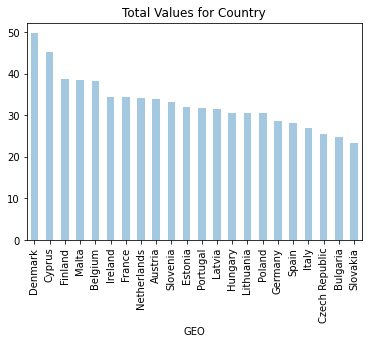

In [43]:
totalSum.plot(
    kind = 'bar', style = 'b', alpha = 0.4,
    title = 'Total Values for Country'
)
plt.show()

Note that if we want the bars ordered from the highest to the lowest value, we
need to sort the values in the Series first. The parameter `kind` used in the `plot`
function defines which kind of graphic will be used. In our case, a bar graph. The
parameter style refers to the `style` properties of the graphic, in our case, the color
of bars is set to b (blue). The `alpha` channel can be modified adding a keyword
parameter alpha with a percentage, producing a more translucent plot. Finally,
using the `title` keyword the name of the graphic can be set.

It is also possible to plot a DataFrame directly. In this case, each column is treated
as a separated Series. For example, instead of printing the accumulated value over
the years, we can plot the value for each year.

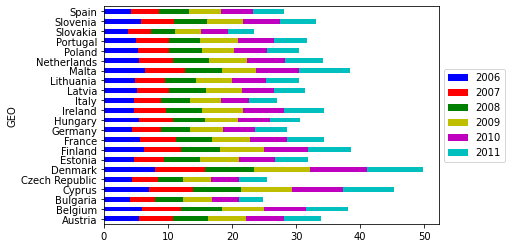

In [44]:
colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(
    kind = 'barh',
    stacked = True,
    color = colors
)
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In this case, we have used a horizontal bar graph (kind=’barh’) stacking all the
years in the same country bar. This can be done by setting the parameter stacked
to True.